# Hi everyone!
My name is Shahar Michaeli. I'm going to explore the data of Kaggle tournament - House Prices House Prices: Advanced Regression Techniques.
Our goal is to predict the 'Sale Price' feature, the sale price amount of house by given the data with linear regression.
We will use SGD Regressor , but before that we will find the optimal features and optimal SGD hyperparametics!

In [1]:
#imports
from tqdm.auto import tqdm
from sklearn.model_selection import KFold


#Essentials
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# sklearn imports
from sklearn import metrics
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import neural_network
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import plotly.offline as py
py.init_notebook_mode(connected=True)

import os

# Data Analysis

In [2]:
#read csv files and present their shapes
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
test_ID = test['Id']

In [4]:
print('Train shape :',train.shape)
train.head()

Train shape : (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Text(0.5, 1.0, 'Mssing Values Ratio - Train Data')

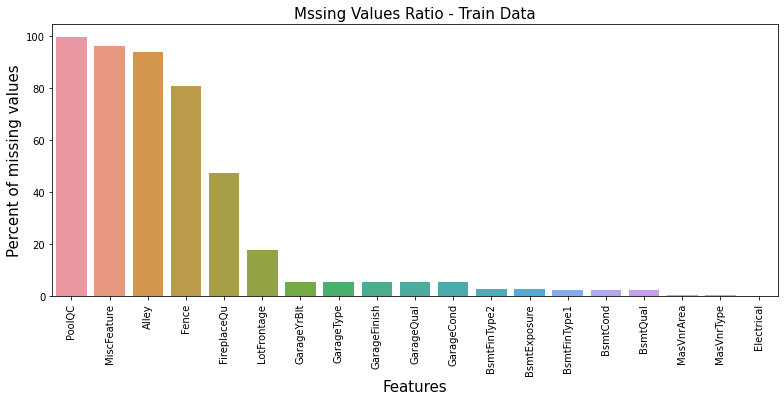

In [5]:
#calculate the missing value ratio of each feature
train_na = (train.isnull().sum() / len(train)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)[:30]

#plot 
f, ax = plt.subplots(figsize=(13, 5))
plt.xticks(rotation='90')
sns.barplot(x=train_na.index, y=train_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Mssing Values Ratio - Train Data', fontsize=15)

The train set is with 1460 entries and 81 features, (include the SalePrice featrue).
We see there are many missing values that we need to fill or drop some features or maybe combine them.

In [6]:
print('Test shape :',test.shape)
test.head()

Test shape : (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Text(0.5, 1.0, 'Mssing Values Ratio - Test Data')

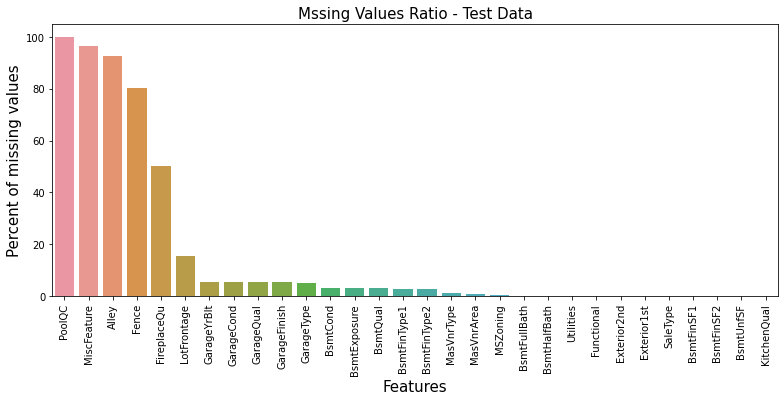

In [7]:
#calculate the missing value ratio of each feature
test_na = (test.isnull().sum() / len(test)) * 100
test_na = test_na.drop(test_na[test_na == 0].index).sort_values(ascending=False)[:30]

#plot 
f, ax = plt.subplots(figsize=(13, 5))
plt.xticks(rotation='90')
sns.barplot(x=test_na.index, y=test_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Mssing Values Ratio - Test Data', fontsize=15)

## Explore 'SalePrice' feature
'SalePrice' feature is our target, the value that we want to predict.
We need to explore this feature to know it better and how it works, which features have an influence on it.

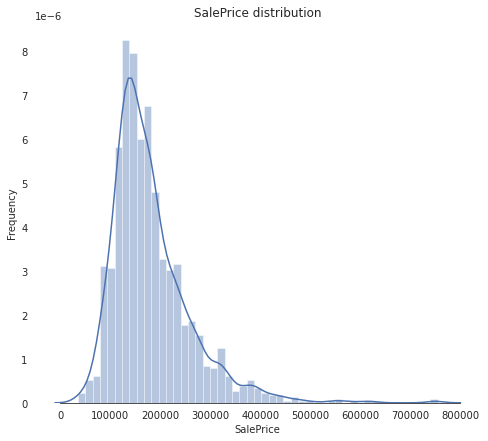

In [8]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(train['SalePrice'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

In [9]:
# Skew and kurt
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


![](https://www.safaribooksonline.com/library/view/clojure-for-data/9781784397180/graphics/7180OS_01_180.jpg)

The 'SalePrice' graph has positive skew, which means there is derived from the normal distribution to the left side, which is means there are houses that are more sold at prices between 100K to 300K. Another thing is the skew, which tells us how much the tails of the graph are flattened, or for normal people - how the 'SalePrice' has more different values.



### Correlation matrix!
Correlation can give us huge inforamtion about how the features impact on 'SalePrice' , let's check it out.
We got a lot of features and we want to select the features with high correlation with 'SalePrice' feature.

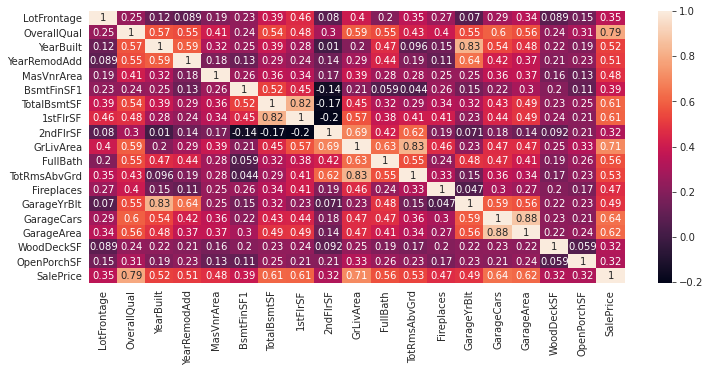

In [10]:
#Coralation plot
corr = train.drop('Id',axis=1).corr()
top_feature = corr.index[abs(corr['SalePrice']>0.3)]
plt.subplots(figsize=(12, 5))
top_corr = train[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

According to our heatmap, these are the variables most correlated with 'SalePrice'.
* OverallQual - It seems very intuitive, a house which is made with the best materials will cost more for sure.
* It seems that 'YearBuilt' is slightly correlated with 'SalePrice'.
* GrLiveArea it makes sense to high correlation with 'SalePrice', as big the living area as the price will be higher.
* 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. 'GarageCars' and 'GarageArea' are like the same.

Another higher correlation that isn't related to the target is TotRmsAbvGrd with GrLiveArea, which is very sensitive, and if the ground is larger so too the room nubmers.

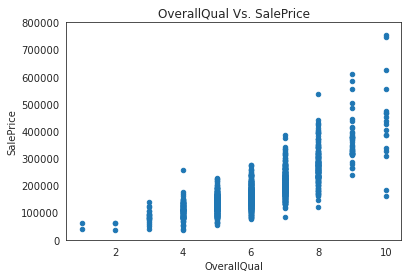

In [11]:
data = pd.concat([train['SalePrice'], train['OverallQual']], axis=1)
data.plot.scatter(x='OverallQual', y='SalePrice', ylim=(0,800000),title='OverallQual Vs. SalePrice');

WoW, this is great!
As we assumed 'OverallQuall' has a huge impact on 'SalePrice' feature!, as the quality of the metarials are better as the price is higher!

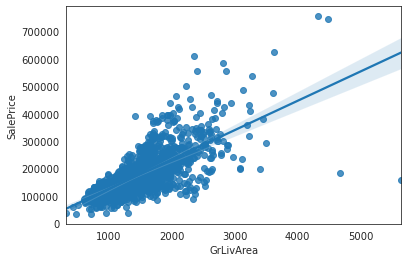

In [12]:
data = pd.concat([train['SalePrice'], train['GrLivArea']], axis=1)
#data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000),title='GrLivArea Vs. SalePrice');
sns.regplot(x="GrLivArea",y="SalePrice",data=data);

'GrLivArea' graph let us know there is a linear line that we can sketch, but the 2 points where 'GrLiveArea' > 4000 maybe can ruin our model.

In [13]:
train = train[train['GrLivArea'] < 4500]

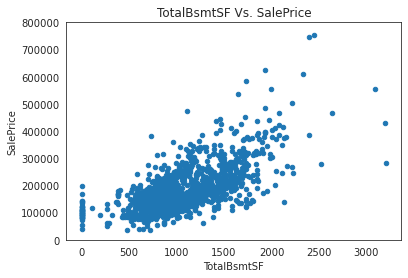

In [14]:
data = pd.concat([train['SalePrice'], train['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000),title='TotalBsmtSF Vs. SalePrice');

From the heatmap we saw the are high correlation with 'SalePrice'.
 TotBsmtSF is very linear too. There are one point that can effect on our model , where the TotalBsmtSF > 6000.


In [15]:
train = train[train['TotalBsmtSF'] < 4500]

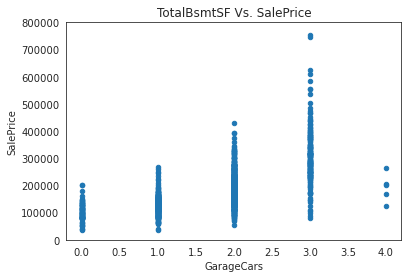

In [16]:
data = pd.concat([train['SalePrice'], train['GarageCars']], axis=1)
data.plot.scatter(x='GarageCars', y='SalePrice', ylim=(0,800000),title='TotalBsmtSF Vs. SalePrice');

## Pandas Profile EDA
We have a huge number of features and it's a bit messy. Exploring each of them alone with SalePrice will be too long and we will not reach the goal.
We will use Panda Profile to get a summary of the Data.


In [17]:
# import ProfileReport and show report of mushroom_df
#from pandas_profiling import ProfileReport
#ProfileReport(train, title="House Prices : Train Data", minimal=True)

# Missing values
As we can see, there are few features with a high missing value ratio. We need to do the distinguished between a categorical features or numeric features or ordinal features.



### Categorical filling NA
* PoolQC : data description says NA means "No Pool". That makes sense, given the huge ratio of missing value (+99%) and the majority of houses have no Pool at all in general. from the description we can see there is no value for NA (means it doesn't have Pool), so we need to assign a new value.

Same thing to all these features ;
* MiscFeature: data description says NA means "no miscMiscellaneous feature"
* Alley: data description says NA means "no alley access"
* Fence: data description says NA means "no fence"
* FireplaceQu: data description says NA means "no fireplace"
* Garage categorical features (GarageType,GarageFinish,GarageQual,GarageCond) 
* Basement categorical features (BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2)


same as the others that below, categorical feature with NA value that means it doesn't have none value and we can replace NA with new value.

In [18]:
for col in ('PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',):
    train[col] = train[col].fillna('None')
    test[col] = test[col].fillna('None')
    
for col in ('BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'):
    train[col] = train[col].fillna('None')
    test[col] = test[col].fillna('None')

* MasVnrType and MasVnrArea are comes togheter , and MasVnrType has a value with None (from description) so we can assume the missing values are None and MasVnrArea is 0.


In [19]:
train["MasVnrType"] = train["MasVnrType"].fillna("None")
train["MasVnrArea"] = train["MasVnrArea"].fillna(0)

test["MasVnrType"] = test["MasVnrType"].fillna("None")
test["MasVnrArea"] = test["MasVnrArea"].fillna(0)

We need a function to make random choice between values in categorical features.

In [20]:
def fill_na_random_pick_column_distribution(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    df_null = df[df[column_name].isnull()]
    options = np.random.choice(df_not_null[column_name])
    df[column_name] = df[column_name].apply(lambda x: np.random.choice(df_not_null[column_name]) if pd.isnull(x) else x)

There are another type of missing values and they are categorical features too, but the NA doens't mean now that there isn't for DON'T HAVE value, and we need to make random choise to fill our NA values.

* Exterior1st - Exterior covering on house , one missing value.
* Exterior2nd - Exterior covering on house (if more than one material) , one missing value.

* BsmtFullBath and BsmtHalfBath shows us the basement bathroom, 2 missing value each.
* KitchenQual - Kitchen quality, we need to random choice from the different values, 1 missing value.
* Functional - Home functionality , 2 missing values.
* SaleType - Type of sale , 1 missing value.
* MSZoning - The general zoning classification
* Electrical - Electrical system , one missing value.


In [21]:
for col in ['Exterior1st','Exterior2nd','BsmtFullBath','BsmtHalfBath','KitchenQual','Functional','SaleType','MSZoning','Electrical']:
    fill_na_random_pick_column_distribution(train, col)
    fill_na_random_pick_column_distribution(test, col)

## Numeric filling NA
* LotFrontage: Linear feet of street connected to property, it has normal distrubition and I'm going to fill the NAs with median value.



In [22]:
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].median())
test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].median())

The features BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF missing values are likely zero for having no basement.

In [23]:
for col in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']:
    train[col] = train[col].fillna('None')
    test[col] = test[col].fillna('None')

GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)
also the 'TotalBsmtSF' , if its value is 0 which means no basement.

In [24]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars','TotalBsmtSF'):
    train[col] = train[col].fillna(0)
    test[col] = test[col].fillna(0)

## Drop features
* Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.

* Street, same as Utilities - all records are "Pave" and only two for "Grvl", so it won't help in modelling.

In [25]:
train = train.drop(['Utilities','Street'], axis=1)
test = test.drop(['Utilities','Street'], axis=1)

## New features 

We see there is a lot combination of one feature that is splitted to other feature.
* TotalSF - Total square feet of the house.
* Total_Bathrooms - Sum the bathrooms.

In [26]:
#train
train['TotalSF']=train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']

train['Total_Bathrooms'] = (train['FullBath'] + (0.5 * train['HalfBath']) +
                               train['BsmtFullBath'] + (0.5 * train['BsmtHalfBath']))


#test
test['TotalSF']=test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']


test['Total_Bathrooms'] = (test['FullBath'] + (0.5 * test['HalfBath']) +
                               test['BsmtFullBath'] + (0.5 * test['BsmtHalfBath']))


Another new features that we need is about the Garage , Pool and the Basement - We want to some feature to tell us if there any pool,garage or basement.

In [27]:
# train
train['hasPool'] = train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
train['hasGarage'] = train['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
train['hasBsmt'] = train['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

#test
test['hasPool'] = test['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
test['hasGarage'] = test['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
test['hasBsmt'] = test['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

# Feature Selection
We can use Scikit-learn RFECV to use CV and choose the best number of features on this dataset.
The default CV is 5-fold cross-validation.
We will enter the Scikit-learn RepeatedKFold to repeat each KFold a few times with different splits to be sure about our test.



In [28]:
t = train['SalePrice'].copy()
X = train.drop(['SalePrice'], axis=1)


In [29]:
# flatten nd array to 1d array
def fromNDArrayto1DArray(nd_array):
    if isinstance(nd_array, str):
        return [nd_array]

    oned_array = []
    try:
        for v in nd_array:
            oned_array += fromNDArrayto1DArray(v)
        return oned_array
    except TypeError:
        return [nd_array]


In [30]:
# find best subset of features on this dataset
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedKFold

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
all_cols = categorical_cols.tolist() + numerical_cols.tolist()

# You can do any encoder that you want, but Oridnal doesn't change the columns and it more comfortable.
#The CT first do the "encoding" and after "standard".
ct = ColumnTransformer([("encoding", OrdinalEncoder(), categorical_cols),
            ("standard", StandardScaler(), numerical_cols)])

#prepare train dataframe to RFECV, the data that isn't encoded already not acceptable.
X_encoded = pd.DataFrame(ct.fit_transform(X,t),)
selector = RFECV(SGDRegressor(max_iter=10000,random_state=1), cv=RepeatedKFold(n_splits=10, n_repeats=2, random_state=1)).fit(X_encoded,t)

In [31]:
only_positive_scores = list(filter(lambda x: x >= 0, selector.grid_scores_))
fig = px.line(x=[i for i in range(1, len(only_positive_scores) + 1)], y=only_positive_scores)
fig.update_layout(autosize=False, width=700, height=500)
fig.show()

In [32]:
train_best_features = X.loc[:, selector.support_]
columns = []
for col in train_best_features.columns:
    columns.append(col)
    
print("Number features :" , len(columns))
print("The best sub features group is: ", columns)

Number features : 46
The best sub features group is:  ['Id', 'MSSubClass', 'Alley', 'LotConfig', 'LandSlope', 'Condition1', 'OverallQual', 'OverallCond', 'YearBuilt', 'RoofStyle', 'Exterior1st', 'MasVnrType', 'MasVnrArea', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'TotalSF', 'hasBsmt']


In [33]:
test = test[columns]
columns_train = columns+['SalePrice']
train = train[columns_train]

train.reset_index(drop=True, inplace=True)

As we can see, the optiaml groupts features sub features group and with that features I will use in the prediction.

In [34]:
t = train['SalePrice'].copy()
X = train.drop(['SalePrice'], axis=1)

# Polynomial Degree

Another thing that we can do to improve our results after we find the best sub features group, is to find the optimal degree 

In [35]:
# calculate score and loss from cv (KFold or LPO) and display graphs
def get_cv_score_and_loss(X, t, model, transformer=None, k=None, p=None, show_score_loss_graphs=False, use_pbar=True):
    scores_losses_df = pd.DataFrame(columns=['fold_id', 'split', 'score', 'RMSE'])

    if k is not None:
        cv = KFold(n_splits=k, shuffle=True, random_state=1)
    elif p is not None:
        cv = LeavePOut(p)
    else:
        raise ValueError('you need to specify k or p in order for the cv to work')

    if use_pbar:
        pbar = tqdm(desc='Computing Models')
        
    for i, (train_ids, val_ids) in enumerate(cv.split(X)):
        X_train = X.loc[train_ids]
        t_train = t.loc[train_ids]
        X_val = X.loc[val_ids]
        t_val = t.loc[val_ids]

        model.fit(X_train, t_train)

        y_train = model.predict(X_train)
        y_val = model.predict(X_val)
        scores_losses_df.loc[len(scores_losses_df)] = [i, 'train', model.score(X_train, t_train), np.sqrt(mean_squared_error(t_train, y_train))]
        scores_losses_df.loc[len(scores_losses_df)] = [i, 'val', model.score(X_val, t_val), np.sqrt(mean_squared_error(t_val, y_val))]

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    val_scores_losses_df = scores_losses_df[scores_losses_df['split']=='val']
    train_scores_losses_df = scores_losses_df[scores_losses_df['split']=='train']

    mean_val_score = val_scores_losses_df['score'].mean()
    mean_val_RMSE = val_scores_losses_df['RMSE'].mean()
    mean_train_score = train_scores_losses_df['score'].mean()
    mean_train_RMSE = train_scores_losses_df['RMSE'].mean()

    if show_score_loss_graphs:
        fig = px.line(scores_losses_df, x='fold_id', y='score', color='split', title=f'Mean Val Score: {mean_val_score:.2f}, Mean Train Score: {mean_train_score:.2f}')
        fig.show()
        fig = px.line(scores_losses_df, x='fold_id', y='loss', color='split', title=f'Mean Val RMSE: {mean_val_RMSE:.2f}, Mean Train RMSE: {mean_train_RMSE:.2f}')
        fig.show()

    return mean_val_score, mean_val_RMSE, mean_train_score, mean_train_RMSE

In [36]:
# show graph of score and loss by plynomial degree of numerical features
def show_degree_graphs_cv_train(X, t, model, k=None, p=None, max_degree=10):
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
    
    val_train_score_loss_df = pd.DataFrame(columns=['degree', 'split', 'score', 'RMSE'])
    for i in tqdm(range(1, max_degree), desc='Poly Degree'):
        
        # Here we need only OHE (not dummies) because the split in the cv function encode only 
        # with the train values and sometimes validations have other values , and the encoder doesn't know them.
        # So the attribute of OHE - "handle_unknown" ignore that values.
        ct_enc_std_poly = ColumnTransformer([
            ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_cols),
            ("standard_poly", make_pipeline(PolynomialFeatures(degree=i), StandardScaler()), numerical_cols)])
        
        model_pipe = make_pipeline(ct_enc_std_poly, model)
        val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X, t, model_pipe, k=k, p=p, show_score_loss_graphs=False, use_pbar=False)
        val_train_score_loss_df.loc[len(val_train_score_loss_df)] = [i, 'train', train_score, train_loss]
        val_train_score_loss_df.loc[len(val_train_score_loss_df)] = [i, 'cv', val_score, val_loss]

    fig = px.line(val_train_score_loss_df, x='degree', y='score', color='split')
    fig.show()
    fig = px.line(val_train_score_loss_df, x='degree', y='RMSE', color='split')
    fig.show()

show_degree_graphs_cv_train(X, t, SGDRegressor(random_state=1), k=5 ,max_degree=5)

As we can see the best degree that give us the optimal score is 1, so we will not change the data and stay that as normal.

# HyperParameters Tests

I will find the best hyperparameters for our linear classifer.
We going to use SGDClassifier to do our linear regression prediction.

### Learning Rate (eta0)
The learning rate value, let's check if there any optimal value for this hyperparamethic.

In [37]:
MAX_LEARNING_RATE = 7
k = 5
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
    
LR_score_loss_df = pd.DataFrame(columns=['LRate', 'split', 'score', 'RMSE'])
for i in tqdm(range(1, MAX_LEARNING_RATE,1), desc='Learning Rate'):
    ct = ColumnTransformer([("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_cols),
                ("standard", StandardScaler(), numerical_cols)])
    model_pipe = make_pipeline(ct,SGDRegressor(eta0 = i/100,random_state=1))
    val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X, t, model_pipe, k=k, p=None, show_score_loss_graphs=False, use_pbar=False)
    LR_score_loss_df.loc[len(LR_score_loss_df)] = [i/100, 'train', train_score, train_loss]
    LR_score_loss_df.loc[len(LR_score_loss_df)] = [i/100, 'CV', val_score, val_loss]

fig = px.line(LR_score_loss_df, x='LRate', y='score', color='split')
fig.update_layout(autosize=False,    width=700,    height=500)
fig.show()
fig = px.line(LR_score_loss_df, x='LRate', y='RMSE', color='split')
fig.update_layout(autosize=False,    width=700,    height=500)
fig.show()

In [38]:
a  = LR_score_loss_df[LR_score_loss_df['split'] == 'CV']
optimal_eta0 = float(a.loc[a['score'] == a['score'].max(),'LRate'])
print("Optimal Learning Rate (eta0) :",optimal_eta0)

Optimal Learning Rate (eta0) : 0.01


We found the optimal learning rate (eta0) . We will going to use it on our test soon and for now, I will keep investigate the other hyperparamethic and use the optimal rate learning rate.

### Max Iteration
Another hyperparametic to our SGD regressor. The maximum number of passes over the training data (aka epochs). It only impacts the behavior in the fit method ,let's see if there any improvement by changing the 'max_iter' value.

In [39]:
MAX_ITER_NUMBERS = 1000
k = 5
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
    
Max_Iter_score_loss_df = pd.DataFrame(columns=['Number_Iteration', 'split', 'score', 'RMSE'])
for i in tqdm(range(100, MAX_ITER_NUMBERS,100), desc='Max Iteration Regularization'):
    
    ct = ColumnTransformer([("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_cols),
                ("standard", StandardScaler(), numerical_cols)])
    
    model_pipe = make_pipeline(ct,SGDRegressor(eta0 = optimal_eta0,max_iter = i, random_state=1))
    val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X, t, model_pipe, k=k, p=None, show_score_loss_graphs=False, use_pbar=False)
    Max_Iter_score_loss_df.loc[len(Max_Iter_score_loss_df)] = [i, 'train', train_score, train_loss]
    Max_Iter_score_loss_df.loc[len(Max_Iter_score_loss_df)] = [i, 'CV', val_score, val_loss]

 
fig = px.line(Max_Iter_score_loss_df, x='Number_Iteration', y='score', color='split')
fig.update_layout(autosize=False,    width=500,    height=400)
fig.show()
fig = px.line(Max_Iter_score_loss_df, x='Number_Iteration', y='RMSE', color='split')
fig.update_layout(autosize=False,    width=500,    height=500)
fig.show()

As we can see, there is no any change in the graphs, which it means that the epocs number is smaller then 1000.
We don't have any optimalization issue here, so I will stay with max_iter value that is default.

# Alpha

In [40]:
MAX_ALPHA = 24
k = 5
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
    
alpha_score_loss_df = pd.DataFrame(columns=['Alpha', 'split', 'score', 'RMSE'])
for i in tqdm(range(1, MAX_ALPHA,1), desc='Alpha Regularization'):
    
    ct = ColumnTransformer([("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_cols),("standard", StandardScaler(), numerical_cols)])
    
    model_pipe = make_pipeline(ct,SGDRegressor(eta0 = optimal_eta0,alpha = i/100 , random_state=1))
    val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X, t, model_pipe, k=k, p=None, show_score_loss_graphs=False, use_pbar=False)
    alpha_score_loss_df.loc[len(alpha_score_loss_df)] = [i/100, 'train', train_score, train_loss]
    alpha_score_loss_df.loc[len(alpha_score_loss_df)] = [i/100, 'CV', val_score, val_loss]

 
fig = px.line(alpha_score_loss_df, x='Alpha', y='score', color='split')
fig.update_layout(autosize=False,    width=700,    height=500)
fig.show()
fig = px.line(alpha_score_loss_df, x='Alpha', y='RMSE', color='split')
fig.update_layout(autosize=False,    width=700,    height=500)
fig.show()

In [41]:
a  = alpha_score_loss_df[alpha_score_loss_df['split'] == 'CV']
optimal_alpha = float(a.loc[a['score'] == a['score'].max(),'Alpha'])
print("Optimal Alpha :",optimal_alpha)

Optimal Alpha : 0.01


As we can see, we found the optimal alpha. We will going use it one the submission.

# Submission

In [42]:
t = train['SalePrice'].copy()
X = train.drop(['SalePrice'], axis=1)

In [43]:
def encoder_test(encoder):
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
    all_cols = categorical_cols.tolist() + numerical_cols.tolist()

    model = SGDRegressor(eta0 = optimal_eta0,alpha = optimal_alpha,random_state=1)
    transformer = ColumnTransformer([("encoding", encoder, categorical_cols)])

    SGD = make_pipeline(transformer,StandardScaler(),SGDRegressor(eta0 = optimal_eta0,alpha = optimal_alpha,random_state=1)).fit(X,t)
    return SGD.predict(test)

ohe = OneHotEncoder(sparse=False)
de = OneHotEncoder(drop="first", sparse=False)
oe = OrdinalEncoder()

y_test_ohe = encoder_test(ohe)
y_test_de  = encoder_test(de)
y_test_oe  = encoder_test(oe)

In [44]:
# sub_ohe = pd.DataFrame()
# sub_ohe['Id'] = test_ID
# sub_ohe['SalePrice'] = y_test_ohe
# sub.to_csv('./sub_ohe.csv',index=False)

# sub_de = pd.DataFrame()
# sub_de['Id'] = test_ID
# sub_de['SalePrice'] = y_test_de
# sub.to_csv('./sub_de.csv',index=False)

sub_oe = pd.DataFrame()
sub_oe['Id'] = test_ID
sub_oe['SalePrice'] = y_test_oe
sub_oe.to_csv('./sub_oe.csv',index=False)

# Encoder tournament

I decided to test prediction with the three encoders, OHE, DE and OE.
The results were :

## One Hot Encoder
![image](https://user-images.githubusercontent.com/49268387/101762151-b98ed700-3ae5-11eb-82ca-366c7b311b24.png)

## Dummies Encoder
![image](https://user-images.githubusercontent.com/49268387/101762215-cf9c9780-3ae5-11eb-8a16-238e525a0d85.png)


## Ordinal Encoder

![image](https://user-images.githubusercontent.com/49268387/101762265-dfb47700-3ae5-11eb-9c8a-3ff9af6a4e2b.png)


As you can see the Ordinal Encoder bring us the est result.

## My Position on the Leaderboard (Public Leaderboard)
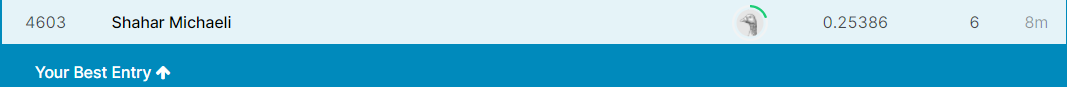



# **Conclusion**

After investigating the data, bulding models and optimizing them by feature selection and find the best polynomia degree to our fetures, I was able to create a Linear Reression model and features that gave me a score of 0.25 RMSE on the test data set according to Kaggle, and brought me to the 4577th place on the leaderboard.

The use with Cross Validation make my hypothesis more preciseand helped me to know my model better.
Another thing is the encoder benefits and how it is very important and can effect on the results .

# References - Guides and Notebooks that helped me
* Aviad's notebooks from the excercises
* [House Prices Solution](https://www.kaggle.com/jesucristo/1-house-prices-solution-top-1)